                    EDA pada dataset spotify terlebih khusus pada negara indonesia

ini adalah project pribadi yang dibuat untuk mengetahui permusikan yang ada di negara indonesia,
saya hanya penasaran lagu seperti apa yang paling banyak diputar di indonesia berdasarkan genrenya dll. 

in this part i try to :
   - eksplor beberapa fitur seperti snapshot_date, daily_rank, popularity, is_explicit, danceability, energy, acousticness, valence, songs(name), artists
   
   - Ubah tipe data kolom
   - ubah nama kolom
   - mengambil beberapa informasi dari statistik deskriptif
   - Cek data duplikat dan nilai null
   - Jumlah lagu yang mengandung kata ekspilisit
   - mengecek kolom daily_rank
   
   - mengeksplor lagu yang berada pada daily_rank = 1
   - Mengeksplor lagu yang berada pada popularity 100
   - correlation between the features
   - Genre : danceability, energy and valence selama di indonesia

# LOAD THE DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df_spotify = pd.read_csv('C:/Users/ASUS/Downloads/top_spotify_songs.csv')
df_spotify

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2KslE17cAJNHTsI2MI0jb2,Standing Next to You,Jung Kook,1,0,0,VN,2024-04-23,92,False,206019,GOLDEN,2023-11-03,0.711,0.809,2,-4.389,0,0.0955,0.0447,0.000000,0.3390,0.816,106.017,4
1,2OzhQlSqBEmt7hmkYxfT6m,Fortnight (feat. Post Malone),"Taylor Swift, Post Malone",2,0,48,VN,2024-04-23,88,False,228965,THE TORTURED POETS DEPARTMENT,2024-04-18,0.675,0.397,11,-10.895,1,0.0245,0.4990,0.000006,0.0939,0.319,95.988,4
2,2HRgqmZQC0MC7GeNuDIXHN,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",3,1,-1,VN,2024-04-23,87,True,183550,GOLDEN,2023-11-03,0.790,0.831,11,-4.185,1,0.0440,0.3120,0.000000,0.0797,0.872,124.987,4
3,2xOhv7XudrBDtkID1jwsFE,Từng Là,Vũ Cát Tường,4,-1,0,VN,2024-04-23,71,False,252500,Từng Là,2024-03-01,0.808,0.414,5,-10.950,1,0.0380,0.8640,0.000118,0.1740,0.609,115.041,4
4,3qhYidu0cemx1v9PgTtpS5,Chúng Ta Của Tương Lai,Sơn Tùng M-TP,5,0,-2,VN,2024-04-23,73,False,249871,Chúng Ta Của Tương Lai,2024-03-08,0.694,0.556,0,-7.097,1,0.0805,0.7870,0.006880,0.1150,0.485,145.954,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676948,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,310490,For All The Dogs,2023-10-06,0.483,0.408,5,-9.243,0,0.0502,0.5080,0.000000,0.2590,0.105,88.880,3
676949,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,173253,SET IT OFF,2023-10-13,0.773,0.635,10,-5.060,1,0.0452,0.0585,0.000000,0.1320,0.476,121.879,4
676950,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,184791,People,2022-12-06,0.573,0.422,10,-7.621,0,0.0678,0.5510,0.000013,0.1020,0.693,124.357,5
676951,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,179560,Layover,2023-08-11,0.633,0.454,9,-8.016,0,0.0875,0.7390,0.000000,0.1480,0.282,74.828,4


In [3]:
df_id = df_spotify[df_spotify['country']=='ID']
df_id

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1200,6EIMUjQ7Q8Zr2VtIUik4He,drunk text,Henry Moodie,1,0,0,ID,2024-04-23,86,False,187263,in all of my lonely nights,2024-01-26,0.614,0.493,0,-5.356,1,0.0314,0.0676,0.000000,0.1130,0.176,94.784,3
1201,51ZQ1vr10ffzbwIjDCwqm4,we can't be friends (wait for your love),Ariana Grande,2,1,1,ID,2024-04-23,96,False,228639,eternal sunshine,2024-03-08,0.645,0.663,5,-8.305,1,0.0447,0.0657,0.000032,0.0751,0.287,115.830,4
1202,3qhlB30KknSejmIvZZLjOD,End of Beginning,Djo,3,-1,-1,ID,2024-04-23,99,False,159245,DECIDE,2022-09-16,0.689,0.454,2,-7.643,1,0.0584,0.0351,0.002590,0.0707,0.912,159.982,4
1203,6XKEElbr3cWmnUw6a5HRBV,Mati-Matian,Mahalini,4,0,1,ID,2024-04-23,78,False,244137,Mati-Matian,2024-03-29,0.440,0.389,5,-6.412,1,0.0368,0.7950,0.000019,0.1490,0.176,116.839,4
1204,6L1jkVbb331DNvK89C3L8u,Masih Hatiku,"Arsy Widianto, Tiara Andini",5,2,2,ID,2024-04-23,79,False,262341,Masih Hatiku,2024-02-22,0.596,0.466,9,-8.341,1,0.0309,0.8170,0.000002,0.1450,0.355,136.191,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675448,3hUxzQpSfdDqwM3ZTFQY0K,august,Taylor Swift,46,4,0,ID,2023-10-18,92,False,261922,folklore,2020-07-24,0.532,0.623,5,-9.208,1,0.0331,0.5380,0.000073,0.0925,0.403,89.937,4
675449,1USA6DXJ1qsucoKnDu4vnu,Tak Kan Hilang,Budi Doremi,47,3,0,ID,2023-10-18,79,False,241714,Tak Kan Hilang,2022-02-25,0.527,0.258,4,-9.499,1,0.0319,0.8210,0.000172,0.1480,0.347,139.928,4
675450,0DVCvSb8PhHchIP23JOP9q,Tertawan Hati,Awdella,48,2,0,ID,2023-10-18,75,False,237863,Tertawan Hati,2022-07-01,0.318,0.431,6,-5.831,1,0.0319,0.6630,0.000000,0.1080,0.249,128.658,4
675451,5IhULiOyG58jL20qWkztEg,Dumes,"OMWAWES, Guyon Waton",49,1,0,ID,2023-10-18,75,False,266666,Dumes,2023-06-30,0.565,0.687,7,-8.545,1,0.0285,0.0386,0.000009,0.0718,0.595,134.998,4


## Ubah tipe data kolom
tipe kolom snapshot_date dan album_release_date seharusnya bertipe datetime64[ns]

In [6]:
df_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9356 entries, 1200 to 675452
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          9356 non-null   object 
 1   name                9356 non-null   object 
 2   artists             9356 non-null   object 
 3   daily_rank          9356 non-null   int64  
 4   daily_movement      9356 non-null   int64  
 5   weekly_movement     9356 non-null   int64  
 6   country             9356 non-null   object 
 7   snapshot_date       9356 non-null   object 
 8   popularity          9356 non-null   int64  
 9   is_explicit         9356 non-null   bool   
 10  duration_ms         9356 non-null   int64  
 11  album_name          9356 non-null   object 
 12  album_release_date  9356 non-null   object 
 13  danceability        9356 non-null   float64
 14  energy              9356 non-null   float64
 15  key                 9356 non-null   int64  
 16  l

In [7]:
print('tipe kolom snapshot_date dan album_release_date sekarang bertipe datetime64[ns]\n')

df_id.loc[:,'snapshot_date'] = pd.to_datetime(df_id.loc[:,'snapshot_date'])
df_id.loc[:,'album_release_date'] = pd.to_datetime(df_id.loc[:,'album_release_date'])
df_id.info()

tipe kolom snapshot_date dan album_release_date sekarang bertipe datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9356 entries, 1200 to 675452
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   spotify_id          9356 non-null   object        
 1   name                9356 non-null   object        
 2   artists             9356 non-null   object        
 3   daily_rank          9356 non-null   int64         
 4   daily_movement      9356 non-null   int64         
 5   weekly_movement     9356 non-null   int64         
 6   country             9356 non-null   object        
 7   snapshot_date       9356 non-null   datetime64[ns]
 8   popularity          9356 non-null   int64         
 9   is_explicit         9356 non-null   bool          
 10  duration_ms         9356 non-null   int64         
 11  album_name          9356 non-null   object        
 12  album_release_date

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# ubah nama kolom
Kolom Name merupakan kolom yang berisi kumpulan lagu yang diputar. Untuk memudahkan mengenali kolom ini, kolom tersebut diubah namanya menjadi kolom Songs.

In [18]:
df_id.rename(columns={'name' : 'Songs'}, inplace=True)

# beberapa informasi dari statistik deskriptif

- Pengumpulan data dimulai dari 2023-10-18 sampai dengan 2024-04-23
- Banyaknya hari terhitung dari 2023-10-18 sampai dengan 2024-04-23 adalah 187 hari
- Lagu Duka dari Nadin Amizah yang paling banyak muncul dalam dataset
- Ada 106 lagu	dari 85 artis
- dalam kumpulan data nilai mean masing-masing genre, rata-rata yang diputar:
    - Danceabily = 0.528116	
    - Energy = 0.512441
    - Valnece = 0.385457
    - Acousticness	= 0.516563

In [8]:
df_id.describe(include='all')

<ipython-input-8-49f1477aa211>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_id.describe(include='all')
<ipython-input-8-49f1477aa211>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_id.describe(include='all')


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,9356,9356,9356,9356.000000,9356.000000,9356.000000,9356,9356,9356.000000,9356,9356.000000,9356,9356,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000
unique,117,106,85,NaN,NaN,NaN,1,187,NaN,2,NaN,102,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,6mQLN3zRtAp6ovjusyYKrV,Somebody's Pleasure,Nadin Amizah,NaN,NaN,NaN,ID,2024-03-18 00:00:00,NaN,False,NaN,Menari Dengan Bayangan,2019-11-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,187,187,413,NaN,NaN,NaN,9356,52,NaN,9084,NaN,308,308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-18 00:00:00,NaN,NaN,NaN,NaN,1983-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-23 00:00:00,NaN,NaN,NaN,NaN,2024-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,25.486853,0.485036,1.617251,NaN,NaN,81.524583,NaN,236394.865648,NaN,NaN,0.528116,0.512441,4.840530,-7.768516,0.890552,0.041801,0.516563,0.020936,0.148574,0.385457,121.697536,3.869923
std,NaN,NaN,NaN,14.430872,4.960376,9.383215,NaN,NaN,7.168964,NaN,44820.806317,NaN,NaN,0.109924,0.186276,3.385701,2.510304,0.312218,0.037292,0.330402,0.095366,0.100468,0.176120,29.808638,0.381941
min,NaN,NaN,NaN,1.000000,-29.000000,-32.000000,NaN,NaN,0.000000,NaN,92400.000000,NaN,NaN,0.252000,0.131000,0.000000,-14.958000,0.000000,0.024500,0.000045,0.000000,0.047300,0.100000,67.528000,1.000000
25%,NaN,NaN,NaN,13.000000,-1.000000,-3.000000,NaN,NaN,78.000000,NaN,209647.000000,NaN,NaN,0.461000,0.360000,2.000000,-8.990000,1.000000,0.028500,0.166000,0.000000,0.100000,0.249000,97.377000,4.000000


## Cek data duplikat dan nilai null

In [9]:
if df_id.duplicated().values.any():
    print("The dataset has duplicate entries.")
else:
    print('No duplicate entries in the dataframe.')

No duplicate entries in the dataframe.


In [10]:
[features for features in df_id.columns if df_id[features].isnull().sum()>0]

[]

tidak ada kolom yang null

## ada 2 hari/tanggal yang tidak terekam selama scrapping data yaitu :
 - 2024-03-17
 - 2024-03-15

In [4]:
# ada beberapa tanggal yang tidak masuk dalam kolom snapshot_date
df_id['snapshot_date'].unique()

array(['2024-04-23', '2024-04-22', '2024-04-21', '2024-04-20',
       '2024-04-19', '2024-04-18', '2024-04-17', '2024-04-16',
       '2024-04-15', '2024-04-14', '2024-04-13', '2024-04-12',
       '2024-04-11', '2024-04-10', '2024-04-09', '2024-04-08',
       '2024-04-07', '2024-04-06', '2024-04-05', '2024-04-04',
       '2024-04-03', '2024-04-02', '2024-04-01', '2024-03-31',
       '2024-03-30', '2024-03-29', '2024-03-28', '2024-03-27',
       '2024-03-26', '2024-03-25', '2024-03-24', '2024-03-23',
       '2024-03-22', '2024-03-21', '2024-03-20', '2024-03-19',
       '2024-03-18', '2024-03-16', '2024-03-14', '2024-03-13',
       '2024-03-12', '2024-03-11', '2024-03-10', '2024-03-09',
       '2024-03-08', '2024-03-07', '2024-03-06', '2024-03-05',
       '2024-03-04', '2024-03-03', '2024-03-02', '2024-03-01',
       '2024-02-29', '2024-02-28', '2024-02-27', '2024-02-26',
       '2024-02-25', '2024-02-24', '2024-02-23', '2024-02-22',
       '2024-02-21', '2024-02-20', '2024-02-19', '2024-

# Jumlah lagu yang mengandung kata ekspilisit
dari keseluruhan lagu yang diputar,
sebanyak 9084 lagu yang mengandung kata explicit dan 
272 yang tidak mengandung kata explicit

In [24]:
df_id.is_explicit.value_countsunts()

False    9084
True      272
Name: is_explicit, dtype: int64

## mengecek kolom daily_rank  
tujuan pengecekkan ini untuk memastikan bahwa walaupun kolom daily_rank tidak mempunyai nilai null bisa jadi ada kemungkinan data yang terisi tidak sesuai, seperti ada ranking yang sama dihari yang sama. 

semua data pada kolom daily_rank terisi dengan semestinya yaitu 1-50 per harinya

In [12]:
# cari angka yang tidak ada di kolom daily_rank
# mengecek ranking yang kemungkinan hilang atau tidak ada
for snapshot_date in df_id['snapshot_date'].unique():
    daily = [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
    
    aa = df_id[df_id.snapshot_date==pd.Timestamp(snapshot_date)]

    diff = set(aa.daily_rank.to_list()).difference(set(daily))
    print(diff)

set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set(

In [11]:
df_id.columns

Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

# mengeksplor lagu yang berada pada daily_rank 1

lagu yang mendapatkan daily ranking 1:

    penjaga hati	   selama 145 hari
	drunk text         selama 25  hari
	End of Beginning   selama 14  hari
	Tak Dianggap	   selama 3   hari
    
    
lagu penjaga hati muncul dengan daily ranking 1 terbanyak yaitu selama 145 hari

lagu penjaga hati dirilis pada 21-06-2023 tapi masih bisa mendapatkan daily ranking 1 pada tahun 2024

secara berurut mulai dari tanggal diambilnya data pada 18-10-2023 sampai 13-03-2024 kecuali pada tanggal 05-03-2024 dan 06-03-2024 itu tidak mendapatkan daily_rank 1

In [20]:
daily_rank_1= df_id[df_id['daily_rank'] == 1]

songs_daily_rank_1 = df_id.groupby(['snapshot_date','Songs','album_release_date', daily_rank_1['daily_rank']]).size().reset_index().rename(columns={0:'jumlah'})
# songs_daily_rank_1.sort_values(by ='snapshot_date', ascending=False).head(26)



In [21]:
groupby_songs_daily_rank_1 =songs_daily_rank_1.groupby('Songs').size().reset_index().rename(columns={0:'Amount'}).sort_values('Amount',ascending=False)
display(groupby_songs_daily_rank_1)

def lagu_daily_rank_1(song):
    music = daily_rank_1[(daily_rank_1['Songs'] == song)]
    print('album_release_date',music.album_release_date.head(1),'\n')
    print(music.snapshot_date.unique())
    
    
lagu_daily_rank_1('penjaga hati')

,Songs,Amount
3,penjaga hati,145
2,drunk text,25
0,End of Beginning,14
1,Tak Dianggap,3


album_release_date 139431   2023-06-21
Name: album_release_date, dtype: datetime64[ns] 

['2024-03-13T00:00:00.000000000' '2024-03-12T00:00:00.000000000'
 '2024-03-11T00:00:00.000000000' '2024-03-10T00:00:00.000000000'
 '2024-03-09T00:00:00.000000000' '2024-03-07T00:00:00.000000000'
 '2024-03-04T00:00:00.000000000' '2024-03-03T00:00:00.000000000'
 '2024-03-02T00:00:00.000000000' '2024-03-01T00:00:00.000000000'
 '2024-02-29T00:00:00.000000000' '2024-02-28T00:00:00.000000000'
 '2024-02-27T00:00:00.000000000' '2024-02-26T00:00:00.000000000'
 '2024-02-25T00:00:00.000000000' '2024-02-24T00:00:00.000000000'
 '2024-02-23T00:00:00.000000000' '2024-02-22T00:00:00.000000000'
 '2024-02-21T00:00:00.000000000' '2024-02-20T00:00:00.000000000'
 '2024-02-19T00:00:00.000000000' '2024-02-18T00:00:00.000000000'
 '2024-02-17T00:00:00.000000000' '2024-02-16T00:00:00.000000000'
 '2024-02-15T00:00:00.000000000' '2024-02-14T00:00:00.000000000'
 '2024-02-13T00:00:00.000000000' '2024-02-12T00:00:00.000000000'
 

.




KECENDERUNGAN SETIAP LAGU RANKING 1 KE ARAH GENRE TERTENTU
  
- lagu penjaga hati cenderung ke genre acousticness

- lagu drunk text cenderung ke genre acousticness dan danceability

- lagu end of beginning cenderung ke genre valence dan danceability

- lagu tak dianggap cenderung ke genre acousticness dan danceability

In [23]:
for i in groupby_songs_daily_rank_1.Songs.to_list():
    print('\nSONG : ', i.upper())
    print('-'*30)
    display(df_id[df_id['Songs']==i].sort_index().head(1)[['danceability','energy','acousticness','valence','popularity']])


SONG :  PENJAGA HATI
------------------------------


,danceability,energy,acousticness,valence,popularity
1205,0.509,0.359,0.879,0.329,84



SONG :  DRUNK TEXT
------------------------------


,danceability,energy,acousticness,valence,popularity
1200,0.614,0.493,0.0676,0.176,86



SONG :  END OF BEGINNING
------------------------------


,danceability,energy,acousticness,valence,popularity
1202,0.689,0.454,0.0351,0.912,99



SONG :  TAK DIANGGAP
------------------------------


,danceability,energy,acousticness,valence,popularity
1211,0.614,0.438,0.802,0.302,83


# Mengeksplor lagu yang berada pada popularity 100

- terdapat 1 lagu yang populer serta mengandung kata ekxplicit yaitu greedy dan diputar sebanyak 30 kali
- terdapat 2 lagu yang populer serta non-eksplicit yaitu Cruel Summer diputar sebanyak 18 kali, End of Beginning 2 kali 

In [27]:
#  lagu yang populer serta mengandung kata ekxplicit 

true_explicit =df_id[(df_id.is_explicit==True) & (df_id.popularity==100)]
print('jumlah lagu yang populer dan eksplicit\n', true_explicit.Songs.value_counts(), '\n')
print(true_explicit[['snapshot_date','Songs']])


#  lagu yang populer serta non-eksplicit 

false_explicit = df_id[(df_id.is_explicit==False) & (df_id.popularity==100)]
print('\njumlah lagu yang populer dan non-eksplicit\n', false_explicit.Songs.value_counts())
print('\n',false_explicit[['snapshot_date','Songs']])

jumlah lagu yang populer dan eksplicit
 greedy    30
Name: Songs, dtype: int64 

       snapshot_date   Songs
216114    2024-02-21  greedy
314654    2024-01-25  greedy
318303    2024-01-24  greedy
336536    2024-01-19  greedy
340182    2024-01-18  greedy
343836    2024-01-17  greedy
518968    2023-11-30  greedy
522616    2023-11-29  greedy
526261    2023-11-28  greedy
529910    2023-11-27  greedy
533558    2023-11-26  greedy
537207    2023-11-25  greedy
540853    2023-11-24  greedy
544495    2023-11-23  greedy
548141    2023-11-22  greedy
551778    2023-11-21  greedy
555562    2023-11-20  greedy
559143    2023-11-19  greedy
562639    2023-11-18  greedy
566186    2023-11-17  greedy
569780    2023-11-16  greedy
573416    2023-11-15  greedy
577050    2023-11-14  greedy
580692    2023-11-13  greedy
584280    2023-11-12  greedy
587922    2023-11-11  greedy
591559    2023-11-10  greedy
595205    2023-11-09  greedy
598842    2023-11-08  greedy
602483    2023-11-07  greedy

jumlah lagu yang po

In [28]:
# genre yang dimiliki oleh lagu yang mendapatkan kepopuleran 100 
genre_popularity_100 = df_id[df_id.popularity==100]
for song in genre_popularity_100['Songs'].unique():
    display(genre_popularity_100[genre_popularity_100['Songs'] == song].head(1)[['artists','Songs','danceability', 'energy', 'valence']])
    


,artists,Songs,danceability,energy,valence
3051,Djo,End of Beginning,0.689,0.454,0.912


,artists,Songs,danceability,energy,valence
186895,Taylor Swift,Cruel Summer,0.552,0.702,0.564


,artists,Songs,danceability,energy,valence
216114,Tate McRae,greedy,0.75,0.733,0.844


.

rata-rata lagu yang masuk dalam popularitas tertinggi (100) lebih dominan
ke arah lagu yang berenergi, Biasanya trek yang energik terasa cepat, keras, dan berisik. Misalnya saja death metal yang mempunyai energi tinggi dan valence yaitu kepositifan musik yang disampaikan seperti bahagia atau ceria.

In [29]:
# rata-rata genre lagu yang populer
mean = genre_popularity_100.groupby('artists').agg(
{
    'danceability': 'mean',
    'energy' : 'mean',
    'valence' : 'mean',
    'acousticness' : 'mean'
})
print(mean)

mean.mean()


              danceability  energy  valence  acousticness
artists                                                  
Djo                  0.689   0.454    0.912        0.0351
Tate McRae           0.750   0.733    0.844        0.2560
Taylor Swift         0.552   0.702    0.564        0.1170


danceability    0.663667
energy          0.629667
valence         0.773333
acousticness    0.136033
dtype: float64

# correlation between the features

ada 3 features yang terlihat paling mempunyai corelasi
- is_explicit - speechiness = 0.6 sampai 0.8
- energy - valence =  0.6 sampai 0.8
- energy - loudness = 0.8 sampai 1.0

<AxesSubplot:>

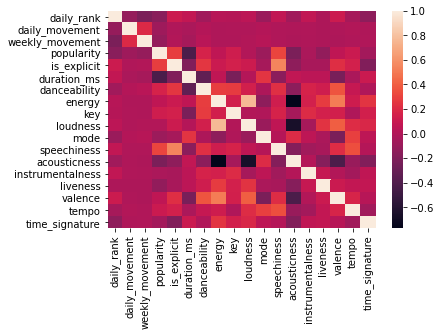

In [30]:
sns.heatmap(df_id.corr())

## Genre : danceability, energy and valence selama di indonesia

dalam beberapa bulan terakhir ada peningkatan pemutaran lagu dengan tingkat danceability (pertengahan bulan 3 - akhir bulan 4) diikuti dengan tingkat energy yang menurun, ada 4 kali terjadi penigkatan danceability dan nilai tertinggi danceability terjadi pada 11-4-2024:        


1. 2024-03-23 
    - danceability : 0.550720    
    - energy       :  0.492220
    - valence      : 0.386300
   

 
2. 2024-03-30  
    - danceability   :0.550400 
    - energy :0.491000    
    - valence :0.384040
           


3. 2024-04-09         
    - danceability : 0.551300   
    - energy       : 0.484840
    - valence      : 0.374340
           

4. 2024-04-11 
    - danceability : 0.553000
    - energy       : 0.479780
    - valence      : 0.371040 

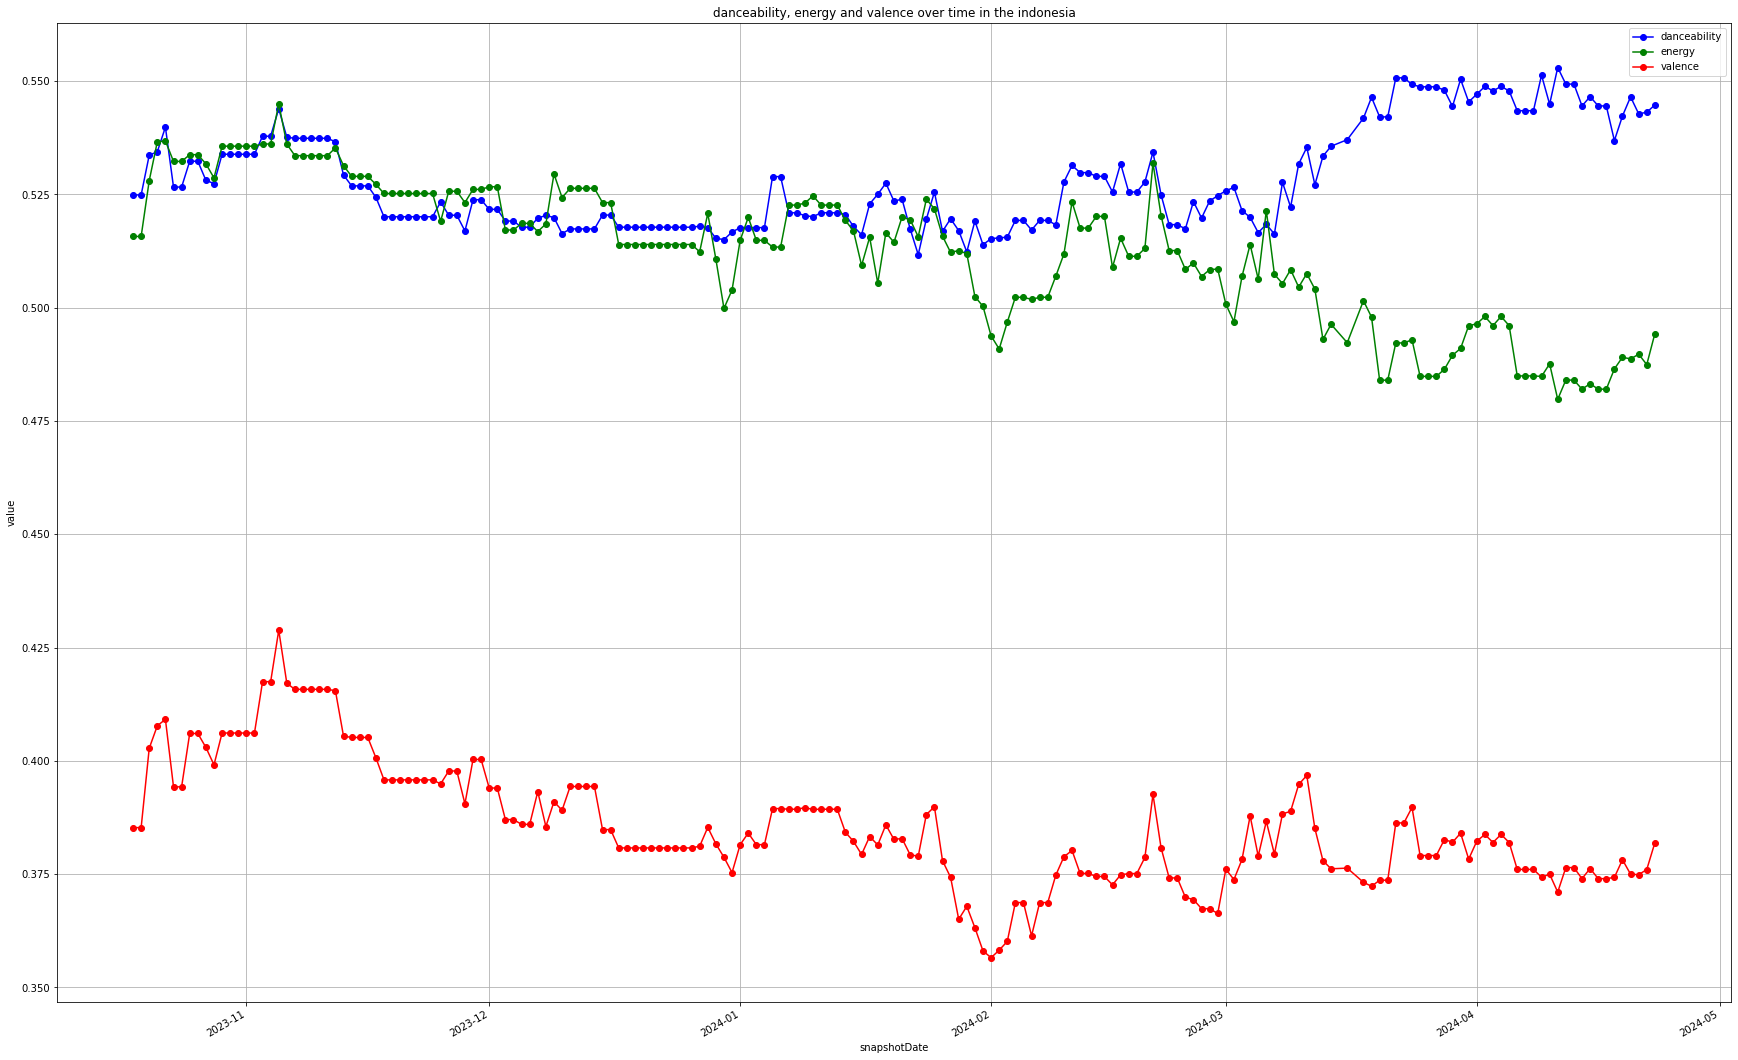

In [34]:
time_series =df_id.groupby(['snapshot_date']).agg({
    'danceability': 'mean',
    'energy' : 'mean',
    'valence' : 'mean',
})
id_time_series = time_series.sort_index()
#print(id_time_series.head())

id_time_series.plot(
    y =['danceability', 'energy', 'valence'],
    color = ['blue', 'green', 'red'],
linestyle= '-', marker= 'o',
figsize =(30,20),
title = 'danceability, energy and valence over time in the indonesia',
xlabel = 'snapshotDate', ylabel='value')

plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [35]:
# peningkatan pemutaran lagu dengan tingkat danceability (pertengahan bulan 3 - akhir bulan 4)
print(id_time_series.tail(60))

               danceability    energy   valence
snapshot_date                                  
2024-02-22         0.524900  0.520320  0.380800
2024-02-23         0.518320  0.512600  0.374160
2024-02-24         0.518320  0.512600  0.374160
2024-02-25         0.517400  0.508460  0.369900
2024-02-26         0.523420  0.509860  0.369380
2024-02-27         0.519780  0.506880  0.367380
2024-02-28         0.523540  0.508400  0.367360
2024-02-29         0.524720  0.508520  0.366320
2024-03-01         0.525800  0.500780  0.376080
2024-03-02         0.526540  0.496900  0.373800
2024-03-03         0.521420  0.506920  0.378240
2024-03-04         0.519940  0.513940  0.387840
2024-03-05         0.516560  0.506300  0.378980
2024-03-06         0.518380  0.521440  0.386640
2024-03-07         0.516260  0.507360  0.379420
2024-03-08         0.527660  0.505320  0.388300
2024-03-09         0.522200  0.508380  0.388860
2024-03-10         0.531720  0.504540  0.394780
2024-03-11         0.535360  0.507520  0